In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

In [90]:
df = pd.read_csv('data/countries-aggregated.csv')
df.Date = pd.to_datetime(df.Date)
print(df.shape)

df.head()

(12600, 5)


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [91]:
df.describe()

,Confirmed,Recovered,Deaths
count,12600.000000,12600.000000,12600.000000
mean,841.617063,245.057698,34.444206
std,7007.418352,3413.867258,373.935248
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,12.000000,0.000000,0.000000
max,188172.000000,76206.000000,12428.000000


In [92]:
df_clean = df[df.Confirmed > 0]
print(df_clean.shape)

df_clean.head()

(5226, 5)


,Date,Country,Confirmed,Recovered,Deaths
36,2020-01-22,China,548,28,17
86,2020-01-22,Japan,2,0,0
90,2020-01-22,"Korea, South",1,0,0
160,2020-01-22,Taiwan*,1,0,0
162,2020-01-22,Thailand,2,0,0


In [93]:
df_day0 = df_clean.groupby('Country', as_index=False)['Date'].min()
df_day0.head()

,Country,Date
0,Afghanistan,2020-02-24
1,Albania,2020-03-09
2,Algeria,2020-02-25
3,Andorra,2020-03-02
4,Angola,2020-03-20


In [94]:
df_clean = df_clean.merge(df_day0, on='Country', suffixes=('', '_day0'))
df_clean['days_since_first_case'] = df_clean['Date'] - df_clean['Date_day0']
df_clean['days_since_first_case'] = pd.to_numeric(df_clean.days_since_first_case) / (60 * 60 * 24 * 1e9)
df_clean.days_since_first_case = df_clean.days_since_first_case.astype(int)
df_clean.head()

,Date,Country,Confirmed,Recovered,Deaths,Date_day0,days_since_first_case
0,2020-01-22,China,548,28,17,2020-01-22,0
1,2020-01-23,China,643,30,18,2020-01-22,1
2,2020-01-24,China,920,36,26,2020-01-22,2
3,2020-01-25,China,1406,39,42,2020-01-22,3
4,2020-01-26,China,2075,49,56,2020-01-22,4


In [99]:
df_clean.groupby('Country')['Confirmed'].max().sort_values(ascending=False)

Country
US                                  188172
Italy                               105792
Spain                                95923
China                                82279
Germany                              71808
France                               52827
Iran                                 44605
United Kingdom                       25481
Switzerland                          16605
Turkey                               13531
Belgium                              12775
Netherlands                          12667
Austria                              10180
Korea, South                          9786
Canada                                8527
Portugal                              7443
Brazil                                5717
Israel                                5358
Norway                                4641
Australia                             4559
Sweden                                4435
Czechia                               3308
Ireland                               3235
Den

In [136]:
worst_countries = df_clean.groupby('Country')['Confirmed'].max().sort_values(ascending=False)[:5].index
worst_countries = list(worst_countries) + ['Brazil']

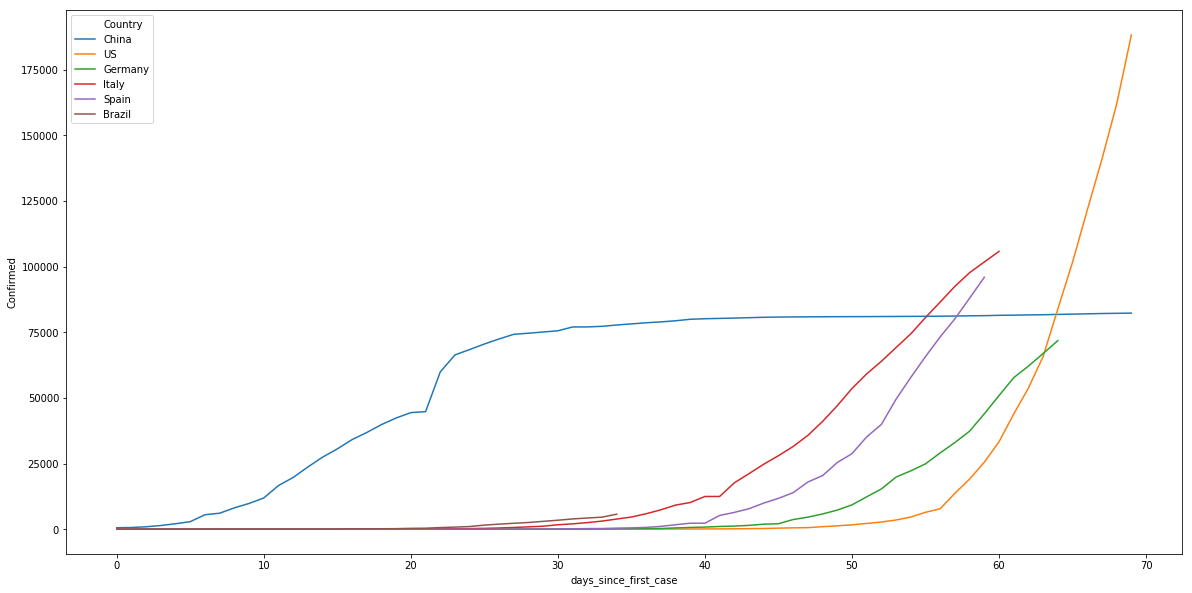

In [137]:
df_filter = df_clean[df_clean.Country.isin(worst_countries)]
# df_filter.loc[:, 'Confirmed'] = pd.np.log(df_filter.Confirmed.copy())

# df_filter.groupby('Country').plot.line(x='days_since_first_case', y='Confirmed', subplots=False)
plt.figure(figsize=(20, 10))
sns.lineplot(x='days_since_first_case', y='Confirmed', hue='Country', sizes=(20, 10), data=df_filter)

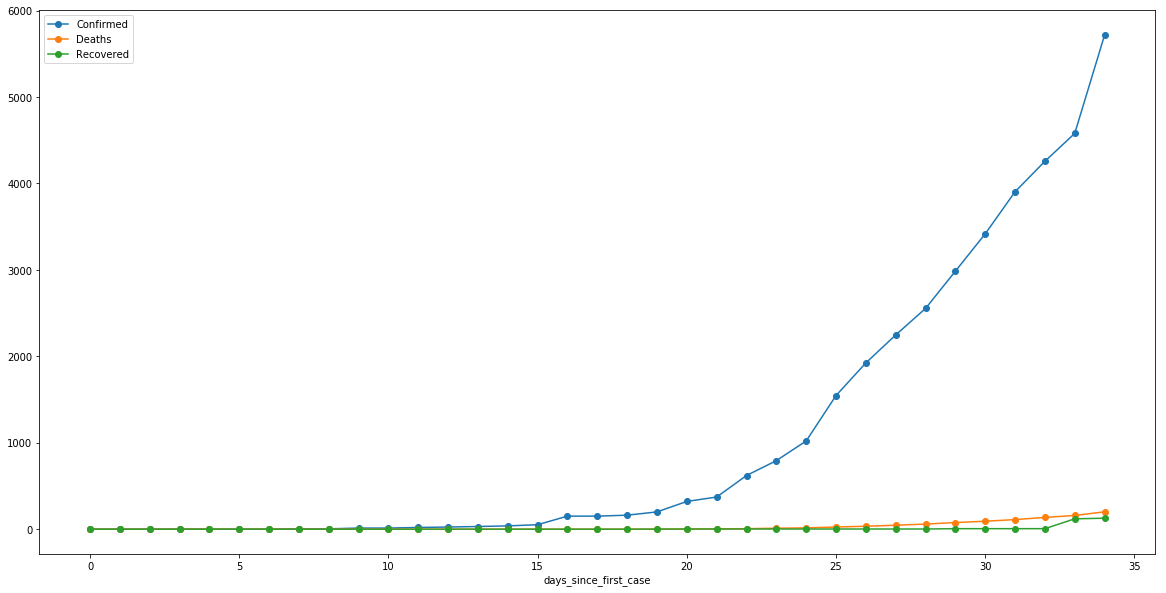

In [147]:
df_brazil = df_clean[df_clean.Country == 'Brazil']

df_brazil.plot.line(x='days_since_first_case', y=['Confirmed', 'Deaths', 'Recovered'], figsize=(20, 10), marker='o')

# Prediction

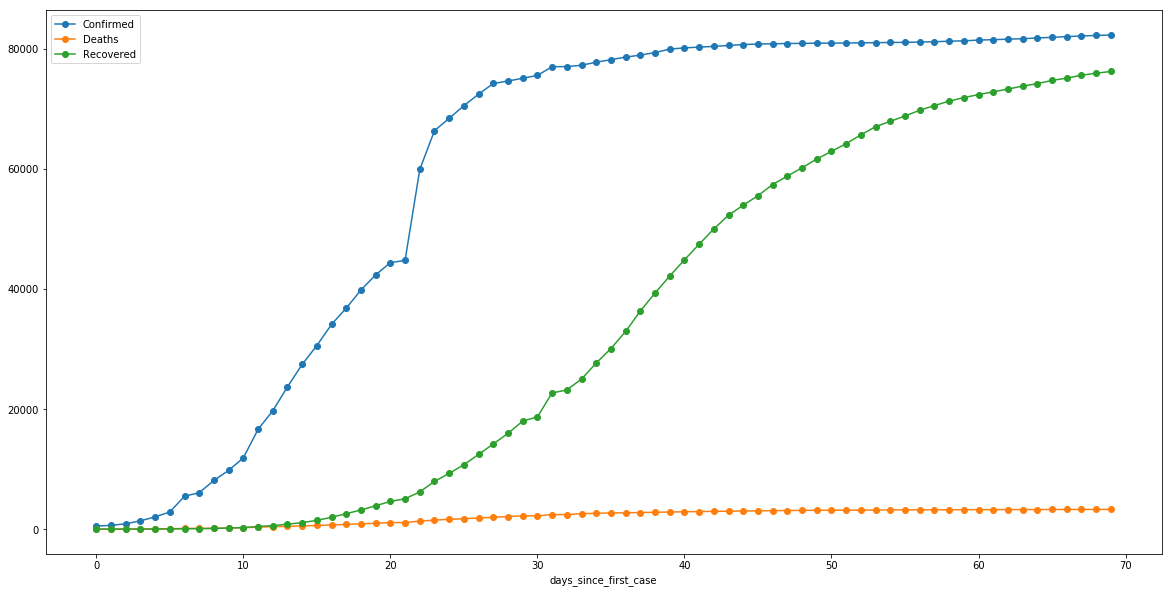

In [163]:
df_china = df_clean[df_clean.Country == 'China']

df_china.plot.line(x='days_since_first_case', y=['Confirmed', 'Deaths', 'Recovered'], figsize=(20, 10), marker='o')

In [173]:
x = df_brazil[['days_since_first_case', 'Deaths', 'Recovered']].values
y = df_brazil.Confirmed.values.reshape(-1, 1)

print(x.shape, y.shape)

(35, 3) (35, 1)


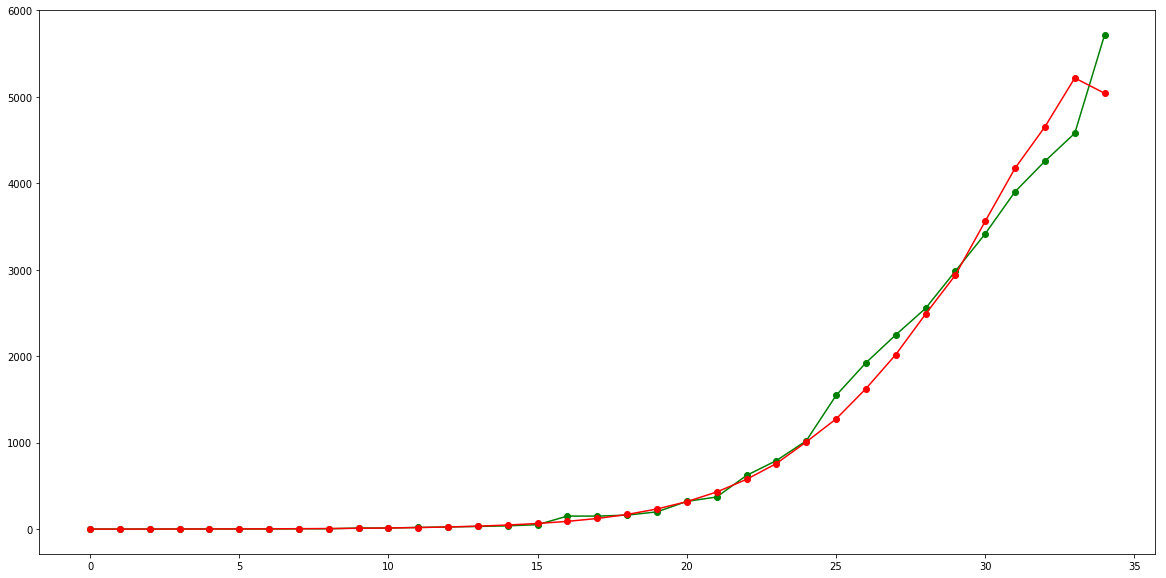

In [174]:
reg = LinearRegression()
reg.fit(x, pd.np.log(y))

y_pred = pd.np.exp(reg.predict(x))

plt.figure(figsize=(20, 10))
plt.plot(x[:, 0], y, color='green', marker='o')
plt.plot(x[:, 0], y_pred, color='red', marker='o')